### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pd.set_option('display.max_columns', None)

### Load and Understand data

In [3]:
df = pd.read_csv("day.csv")

In [4]:
## Check top few records
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## Check data information available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
## Check data size

df.shape

(730, 16)

-  The data contains total 730 rows and 16 columns

In [7]:
## Check null values present in the data

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- This dataset does not contain any null values.

- The columns instant can be dropped becuase instant is simply the index of the record.
- The columns casual and registered can be dropped becuase the target variable cnt is the sum of the casual and registered.

In [9]:
df.drop(columns=['instant','casual','registered'],inplace=True)

In [10]:
df.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985


### Identify numerical and categorical features

-  From the data dictionary it is clear that the following features are ctegorical
    - season 
    - yr
    - mnth
    - holiday 
    - weekday 
    - workingday 
    - weathersit 

- Numerical Features are:
    - instant
    - temp 
    - atemp
    - hum
    - windspeed
    - cnt


### Check summary statistics for numerical columns

In [11]:
df1 = df.loc[:,['temp','atemp','hum','windspeed','cnt']]
df1.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Data Visualisation

#### Visualisation of Numeric Features

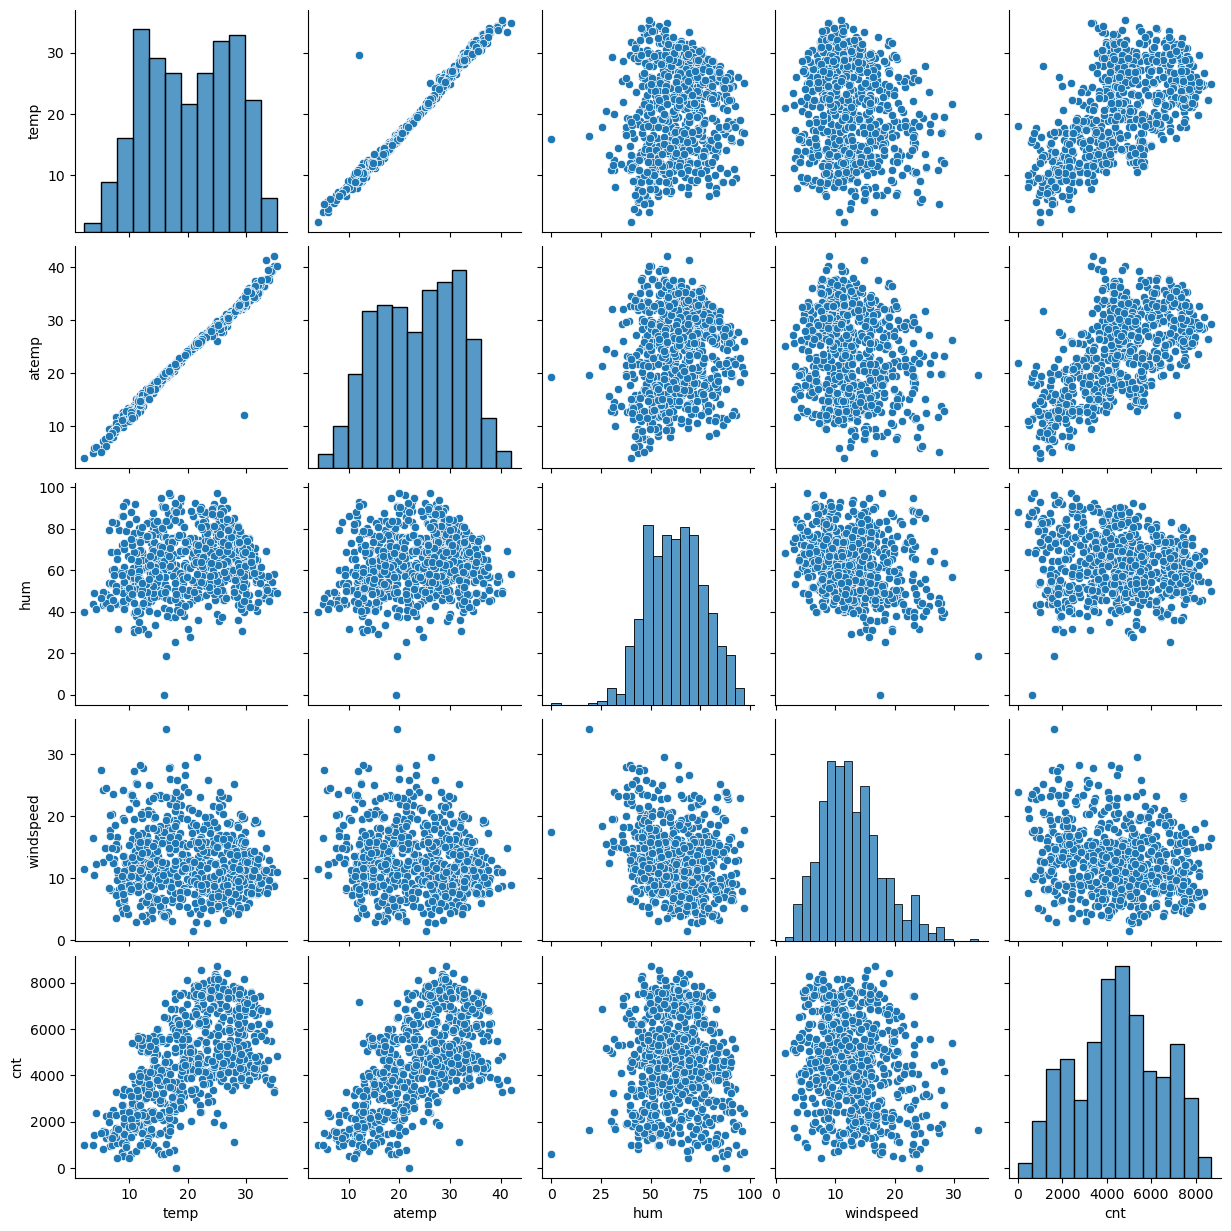

In [12]:
sns.pairplot(df1)
plt.show()

-  From this above plots it is visible that the features temp, atemp have alomost a linear relationship
    with the target variable cnt.

#### Visualisation of categorical features

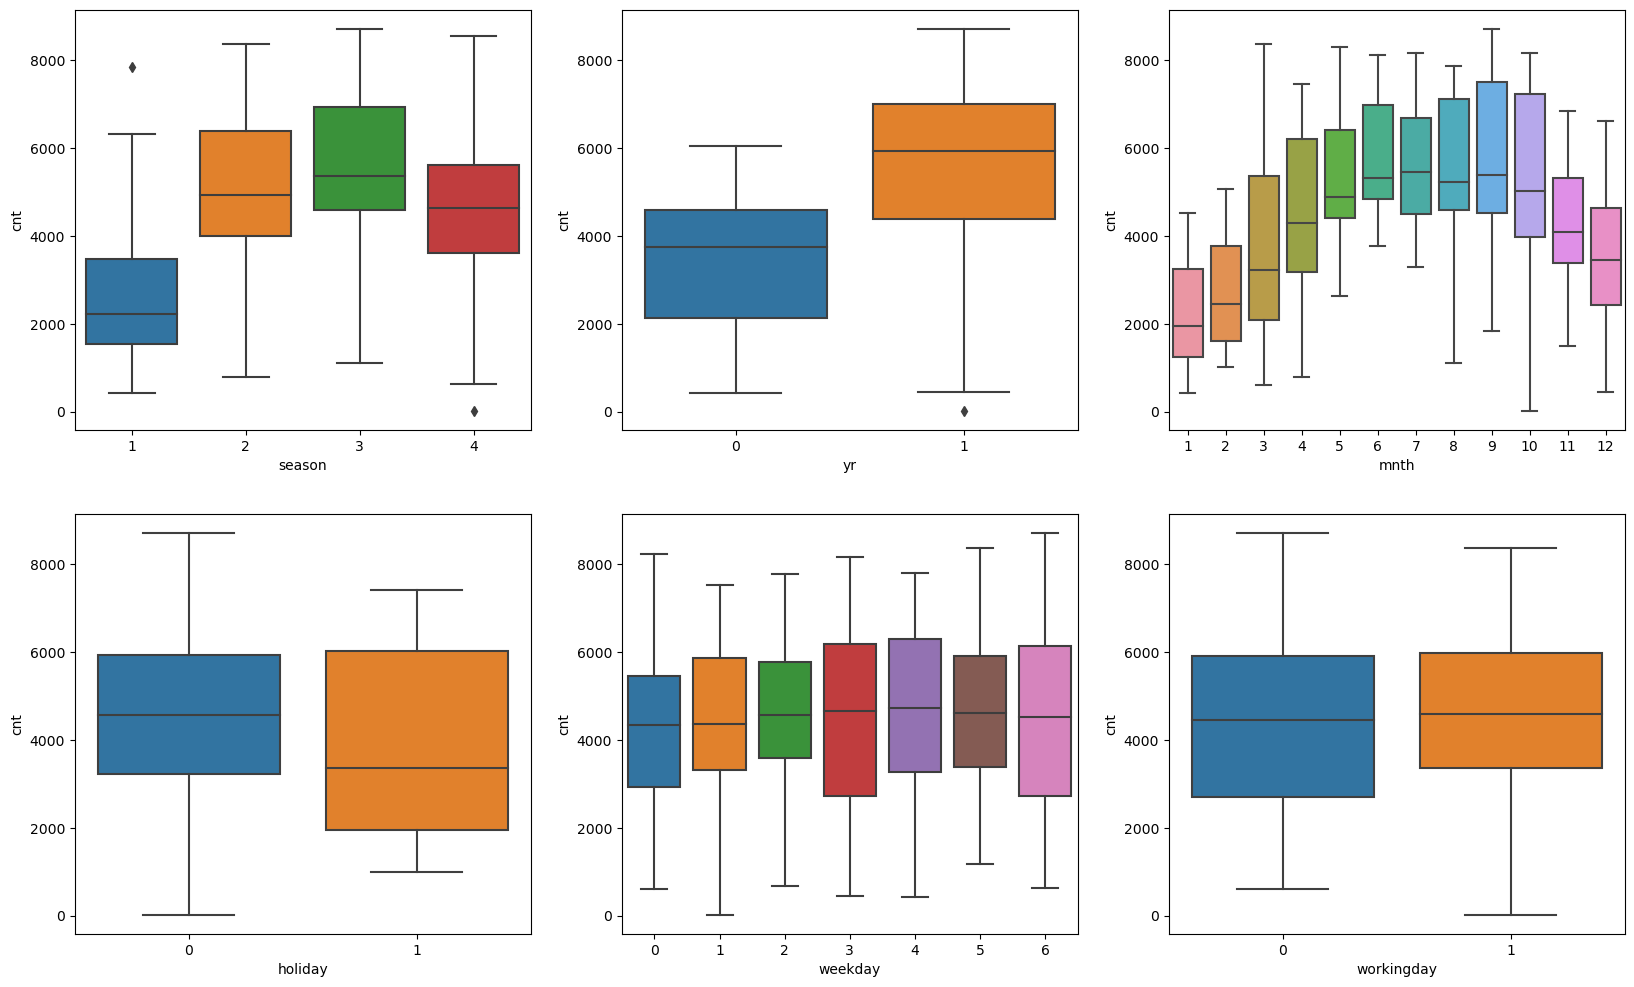

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

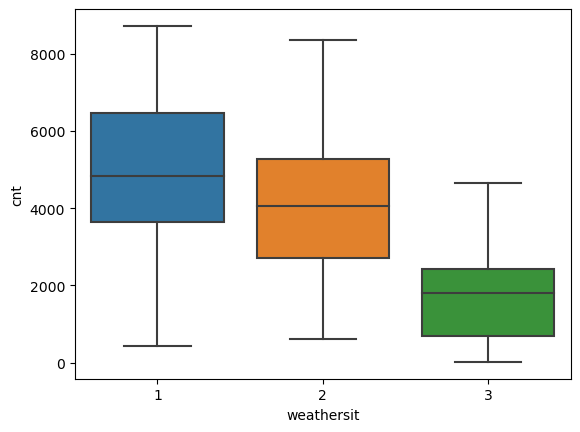

In [14]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

- from the above plots it is clear that,
    - The average count in various seasons are significantly differ.
    - The year 2019 have higher count than 2018.
    - The average count is significantly changing over months, June july and august have higest average counts.
    - The average count is much higher in non-holiday days than in holidays.
    - weathersit has higer average count on "clear" weather than in snow or light snow(3).

### Data Preprocessing and Transformation

In [15]:
df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


- Weekdays are mapped as below in the dataset.

    - Tuesday : 0, Wednesday : 1, Thursday : 2, Friday : 3, Saturday : 4, Sunday : 5, Monday : 6

- season 
    - (1:spring, 2:summer, 3:fall, 4:winter)

- year 
    - (0: 2018, 1:2019)
- month 
    - ( 1 to 12)

- holiday 
    - (0: Not holiday, 1: holiday)

- workingday : 
    - if day is neither weekend nor holiday is 1, otherwise is 0.

- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Create dummy variables for categorical features

In [16]:
weekday_map = { 0 : 'Tuesday', 1 : 'Wednesday', 2 : 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6:'Monday'}
df['weekday'] = df['weekday'].map(weekday_map)

In [17]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,801


In [18]:
season_map = { 1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(season_map)

In [19]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,801


In [20]:
month_map = { 1 : 'jan', 2 : 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6:'jun',
            7 : 'jul', 8 : 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec' }
df['mnth'] = df['mnth'].map(month_map)

In [21]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,801


In [22]:
weathersit_map = {1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'}
df['weathersit'] = df['weathersit'].map(weathersit_map)

In [23]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,Monday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,Tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801


In [24]:
## create dummy variables

dummy_weekday = pd.get_dummies(df['weekday'], drop_first = True)

In [25]:
dummy_weekday.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0


In [26]:
# combine the results to the original dataframe

df = pd.concat([df, dummy_weekday], axis = 1)

In [27]:
dummy_season = pd.get_dummies(df['season'], drop_first = True)

In [28]:
dummy_season.head(1)

,spring,summer,winter
0,1,0,0


In [29]:
# combine the results to the original dataframe

df = pd.concat([df, dummy_season], axis = 1)

In [30]:
## Create dummy variables for month
dummy_month = pd.get_dummies(df['mnth'], drop_first = True)


In [31]:
# combine the results to the original dataframe

df = pd.concat([df, dummy_month], axis = 1)

In [32]:
## Create dummy variables for Weathersit

dummy_weather = pd.get_dummies(df['weathersit'], drop_first = True)

In [33]:
# combine the results to the original dataframe

df = pd.concat([df, dummy_weather], axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
 13  Monday      730 non-null    uint8  
 14  Saturday    730 non-null    uint8  
 15  Sunday      730 non-null    uint8  
 16  Thursday    730 non-null    uint8  
 17  Tuesday     730 non-null    uint8  
 18  Wednesday   730 non-null    uint8  
 19  spring      730 non-null    u

In [35]:
## Check top rows

df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
0,01-01-2018,spring,0,jan,0,Monday,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,02-01-2018,spring,0,jan,0,Tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [36]:
## Let's drop unwanted columns

df.drop(['dteday','season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [38]:
df.shape

(730, 30)

- We have 730 rows and 32 columns all togther.

### Split data for training and testing

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
## Since we have only few records, I made a 80 - 20 split means 80 Percentage of data for training and 20 perc testing.

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Rescaling features

In [41]:
## Here I used Min Max scaling of feature

from sklearn.preprocessing import MinMaxScaler

In [42]:
df.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [43]:
scaler = MinMaxScaler()

## Applying scaling to all numeric variable

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

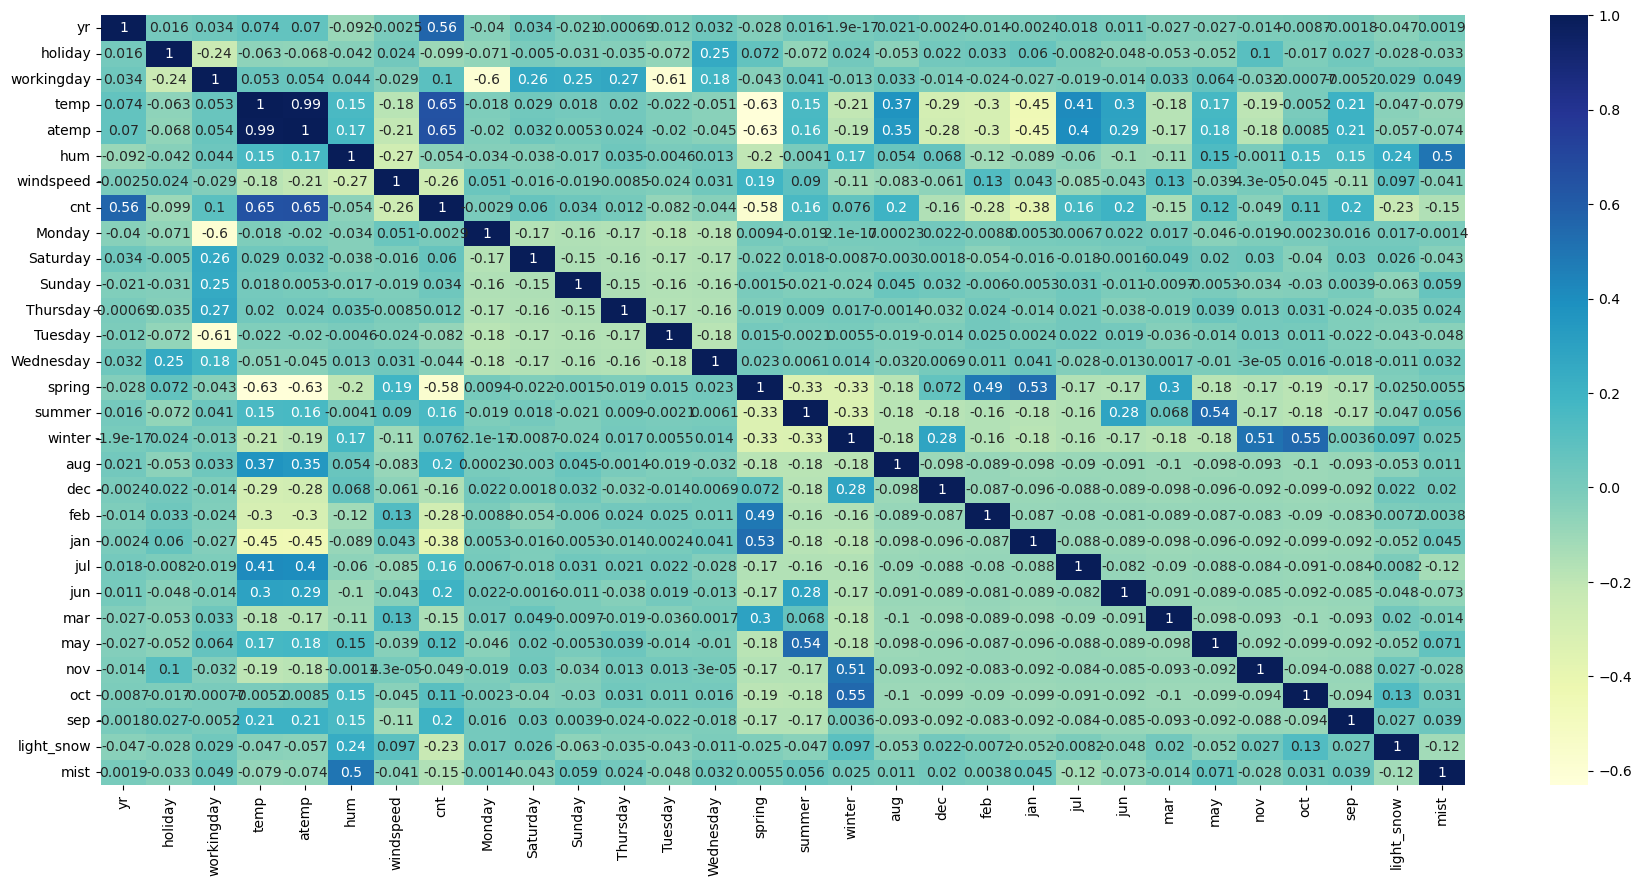

In [44]:
## Check the correlation among variables

plt.figure(figsize = (22, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- from this plot it is clear that,
    - cnt have high +ve correlation with atemp, temp, year.
    - It have strong -Ve correlation with spring and January.

### Applying Recursive Feature Elimination

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          584 non-null    int64  
 1   holiday     584 non-null    int64  
 2   workingday  584 non-null    int64  
 3   temp        584 non-null    float64
 4   atemp       584 non-null    float64
 5   hum         584 non-null    float64
 6   windspeed   584 non-null    float64
 7   cnt         584 non-null    float64
 8   Monday      584 non-null    uint8  
 9   Saturday    584 non-null    uint8  
 10  Sunday      584 non-null    uint8  
 11  Thursday    584 non-null    uint8  
 12  Tuesday     584 non-null    uint8  
 13  Wednesday   584 non-null    uint8  
 14  spring      584 non-null    uint8  
 15  summer      584 non-null    uint8  
 16  winter      584 non-null    uint8  
 17  aug         584 non-null    uint8  
 18  dec         584 non-null    uint8  
 19  feb         584 non-null   

- Here we have 29 features excluding the target variable cnt
- Let's take top 20 features using RFE

#### Divide train data into X and y

In [47]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
X_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']

In [49]:
lm = LinearRegression()
#lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 10),
 ('Sunday', False, 8),
 ('Thursday', False, 3),
 ('Tuesday', True, 1),
 ('Wednesday', False, 2),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 7),
 ('mar', False, 9),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [51]:
### Get RFE selected columns

rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Monday', 'Tuesday', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan',
       'jul', 'nov', 'sep', 'light_snow', 'mist'],
      dtype='object')

In [52]:
### Get RFE not selected columns
non_rfe_cols = X_train.columns[~rfe.support_]
non_rfe_cols

Index(['Saturday', 'Sunday', 'Thursday', 'Wednesday', 'aug', 'jun', 'mar',
       'may', 'oct'],
      dtype='object')

### Build model using Stats library for getting more detailed ststistical info

In [53]:
## create X_train with rfe selected columns

X_train_rfe = X_train[rfe_cols]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     178.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.86e-224
Time:                        14:05:12   Log-Likelihood:                 610.25
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     564   BIC:                            -1093.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2388      0.028      8.673      0.0

- holiday has high p value so we can drop this as it is less significant

In [57]:
X_train2 = X_train_rfe.drop(columns=['holiday'])
X_train2 = sm.add_constant(X_train2)

lm = sm.OLS(y_train,X_train2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     178.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.86e-224
Time:                        14:05:12   Log-Likelihood:                 610.25
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     564   BIC:                            -1093.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2347      0.041      5.728      0.0

- let's drop atemperature since it has high p-value

In [58]:
X_train3 = X_train2.drop(columns=['atemp'])
X_train3 = sm.add_constant(X_train3)

lm = sm.OLS(y_train,X_train3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.51e-225
Time:                        14:05:12   Log-Likelihood:                 610.23
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     565   BIC:                            -1099.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2344      0.041      5.729      0.0

- Let's drop February since it has high p-value

In [59]:
X_train4 = X_train3.drop(columns=['feb'])
X_train4 = sm.add_constant(X_train4)

lm = sm.OLS(y_train,X_train4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     198.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.97e-225
Time:                        14:05:12   Log-Likelihood:                 608.71
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     566   BIC:                            -1103.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.040      5.517      0.0

### Check VIF values of all the features available

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,127.22
2,workingday,8.69
7,Tuesday,5.74
6,Monday,5.66
8,spring,5.39
3,temp,4.45
10,winter,3.63
9,summer,2.74
4,hum,1.97
14,nov,1.68


**Let's take features with vif value < 5**

In [62]:
final_features = vif[vif['VIF'] < 5.0 ]
final_features

,Features,VIF
3,temp,4.45
10,winter,3.63
9,summer,2.74
4,hum,1.97
14,nov,1.68
12,jan,1.64
17,mist,1.61
13,jul,1.51
11,dec,1.47
15,sep,1.33


- **So we selected the above 13 features as final list of features which will be used for model building**

### Build Model using the above selected features

In [63]:
final_feature_list = list(final_features['Features'])
final_feature_list

['temp',
 'winter',
 'summer',
 'hum',
 'nov',
 'jan',
 'mist',
 'jul',
 'dec',
 'sep',
 'light_snow',
 'windspeed',
 'yr']

In [64]:
## Let's add holiday feature as well to the final list since we know that it is a very good indicator for the demand
## From the boxplot in earlier section it is visible.
final_feature_list.append('holiday')

In [65]:
X_train_new = X_train[final_feature_list]
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train_new, y_train)

LinearRegression()

In [66]:
# Make predictions on the train data to make residual analysis
y_pred_train = model.predict(X_train_new)

### Residual Analysis of train data

C:\Users\sajana\AppData\Local\Temp\ipykernel_28448\3854942292.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_pred_train), bins = 20)


Text(0.5, 0, 'Errors')

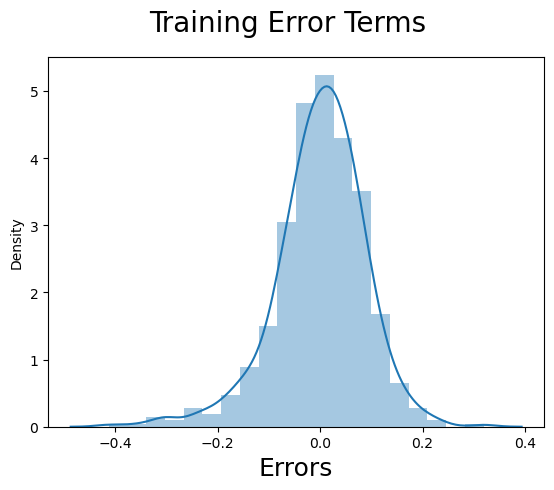

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Training Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- from the above plot it is clear that the error terms also follows a normal distribution.

### Make predictions of Test Data

In [68]:
## Apply scaling on test data

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [69]:
X_test = df_test[final_feature_list]
y_test = df_test['cnt']

In [70]:
y_pred = model.predict(X_test)

### Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

**Checking R2 score**

In [86]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.7751595752432678


**Checking Mean Square Error**

In [87]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.010107808258694428


- The R2 score is 77.5 % means it can explain 77.5 % of variance in the dataset.
- The model has a good R2 score of 0.77 and a very minimum mean square error.
- - So we can consider this model as a an efficient model for good predictions.

#### Let's plot the predicted and actual values

Text(0, 0.5, 'y_pred')

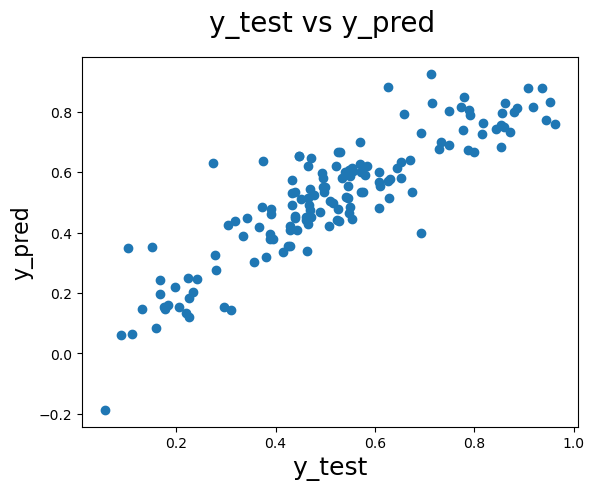

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [81]:
feature_names = list(X_train_new.columns)

In [82]:
coefficients_dict = dict(zip(feature_names, model.coef_))

In [83]:
coefficients_dict

{'temp': 0.5698854067537524,
 'winter': 0.14908821209582923,
 'summer': 0.07527013090023686,
 'hum': -0.16825784710978633,
 'nov': -0.041849398569281396,
 'jan': -0.044425127524284,
 'mist': -0.05191272333498831,
 'jul': -0.0428432814136679,
 'dec': -0.038393376095841654,
 'sep': 0.08266065651380096,
 'light_snow': -0.24471218480033574,
 'windspeed': -0.1898022261253494,
 'yr': 0.2257502295250313,
 'holiday': -0.09779841339388601}

In [84]:
# Print Coefficients of the model

print("Coefficients:", coefficients_dict)


Coefficients: {'temp': 0.5698854067537524, 'winter': 0.14908821209582923, 'summer': 0.07527013090023686, 'hum': -0.16825784710978633, 'nov': -0.041849398569281396, 'jan': -0.044425127524284, 'mist': -0.05191272333498831, 'jul': -0.0428432814136679, 'dec': -0.038393376095841654, 'sep': 0.08266065651380096, 'light_snow': -0.24471218480033574, 'windspeed': -0.1898022261253494, 'yr': 0.2257502295250313, 'holiday': -0.09779841339388601}


In [85]:
## Print intercept of the model
print("Intercept:", model.intercept_)

Intercept: 0.24198434260751667


***Inference***

- The key indicators for the Demand prediction of Bike Sharing are:
    - temp : +ve correlation
    - winter : +ve correlation
    - summer : +ve correlation
    - hum : -ve correlation
    - nov : -ve correlation
    - jan : -ve correlation
    - mist : -ve correlation
    - jul : -ve correlation
    - dec : -ve correlation
    - sep : +ve correlation
    - light_snow : -ve correlation
    - windspeed : -ve correlation
    - yr : +ve correlation
    - holiday : -Ve correlation